In [1]:
#Lucas Swidler
#Group Delta

In [2]:
# Open the .fasta file to begin processing
file = open('unknown_delta.fasta', 'r')
delta_sequence = file.readlines() # Returns a list instead of a string so we can process it easier
file.close()

# Test if we retrieved the list
#print(delta_sequence)

# Begin processing the sequence to use a cleaner version
clean_delta_sequence = delta_sequence[1:] # This removes the descriptor line and leaves the rest
clean_delta_sequence = ''.join(clean_delta_sequence) # This turns the list into one string
clean_delta_sequence = clean_delta_sequence.replace('\n', '') # This removes the newline characters so we have one, consistent string
clean_delta_sequence = clean_delta_sequence.upper() # Converts the whole string into uppercase if needed

# Finally, print out the newly printed string and its length
# Question 1
print('The length of this unknown DNA is', len(clean_delta_sequence))
print(clean_delta_sequence)

The length of this unknown DNA is 64001
TAGTAGCACAGCGCCGCCAGAGAGGCCGCCCATAGCACCACGCCGATTACTGCGGCAATAATTTTAATCCGCTTCGGAAAGAGGAATACCGGGATCAACCACAGCGAACTGAATAACAGCGAGTCGCGAATGCCGTTAGTGCCACTATAACCACTGATGTAAATAATGGCCTGTAGCAGAGTAGAGAAAAACCAAAAGTAGAGCAGTGCCCAACCCAGGGCTTTCCAGCTAAAAAGAGGTTTAGCCTGGACTTCTGTGGAATGCATAGTAAGAACCTGTCTTGAAAAAATATCGCCGAATGTAACGACAATTCCTTAAGGATATCTGAAGGTATATTCAGAATTTGAATAAAATGCAGACAGAAATATATTGAAAACGAGGGTGTTAGAACAGAAGTATTTCAGAAAACCCTCGCGCAAAAGCACGAGGGTTTGCAGAAGAGGAAGATTAGCCGGTATTACGCATACCTGCCGCAATCCCGGCAATAGTGACCATTAACGCTTGTTCGACGCGAGGATCCGGTTCCTGGCCTTCTTTTTCTGCCTGGCGGGAGCGGTGCAGCAACTCGGCCTGCAATACGTTCAGCGGGTCGGTGTAAATATTCCGTAGCTGAATAGACTCTGCAATCCACGGCAGATCGGCCATCAGATGGGAATCGTTGGCAATCGCCAGCACCACTTTGATGTCTTCTTCTTGCAGGTTGCGTAACTCTTTACCTAACGGCCACAGTGCTTTGTCTACCAGGCGTTGGTCATAGTATTCCGCCAGCCACAGGTCTGCTTTGGCGAAGACCATCTCCAGCATGCCGAGACGCGTCGAGAAGAATGGCCAATCGCGGCACATAGCCTCCAGCTCGCTCTGTTTGCCGTCTTCGACCACTTTTTGCAGCGCCGTACCTGCACCCAGCCAGGCGGGGAGCATCAGACGGTTTTGCGTCCAGGCGAAGATCCACGGAATGGC

In [3]:
# Next, we'll find the complement of this sequence
complementDict = {'A': 'T', # We'll use a dictionary to flip each character
                  'C': 'G', 
                  'G': 'C', 
                  'T': 'A'}
complement_delta = ''
for i in clean_delta_sequence:
    complement_delta += complementDict[i] # Fill in the string with the characters that came from applying
                                          # the dictionary to the sequence

# Now that we have the complement sequence, we need to reverse it so that it faces 5' to 3' like the original
rev_comp_delta = complement_delta[::-1]

# Print the original sequence and the reversed complement
# Question 2
print("5' -", clean_delta_sequence, "- 3\n")
print("5' -" ,rev_comp_delta, "- 3'")

5' - TAGTAGCACAGCGCCGCCAGAGAGGCCGCCCATAGCACCACGCCGATTACTGCGGCAATAATTTTAATCCGCTTCGGAAAGAGGAATACCGGGATCAACCACAGCGAACTGAATAACAGCGAGTCGCGAATGCCGTTAGTGCCACTATAACCACTGATGTAAATAATGGCCTGTAGCAGAGTAGAGAAAAACCAAAAGTAGAGCAGTGCCCAACCCAGGGCTTTCCAGCTAAAAAGAGGTTTAGCCTGGACTTCTGTGGAATGCATAGTAAGAACCTGTCTTGAAAAAATATCGCCGAATGTAACGACAATTCCTTAAGGATATCTGAAGGTATATTCAGAATTTGAATAAAATGCAGACAGAAATATATTGAAAACGAGGGTGTTAGAACAGAAGTATTTCAGAAAACCCTCGCGCAAAAGCACGAGGGTTTGCAGAAGAGGAAGATTAGCCGGTATTACGCATACCTGCCGCAATCCCGGCAATAGTGACCATTAACGCTTGTTCGACGCGAGGATCCGGTTCCTGGCCTTCTTTTTCTGCCTGGCGGGAGCGGTGCAGCAACTCGGCCTGCAATACGTTCAGCGGGTCGGTGTAAATATTCCGTAGCTGAATAGACTCTGCAATCCACGGCAGATCGGCCATCAGATGGGAATCGTTGGCAATCGCCAGCACCACTTTGATGTCTTCTTCTTGCAGGTTGCGTAACTCTTTACCTAACGGCCACAGTGCTTTGTCTACCAGGCGTTGGTCATAGTATTCCGCCAGCCACAGGTCTGCTTTGGCGAAGACCATCTCCAGCATGCCGAGACGCGTCGAGAAGAATGGCCAATCGCGGCACATAGCCTCCAGCTCGCTCTGTTTGCCGTCTTCGACCACTTTTTGCAGCGCCGTACCTGCACCCAGCCAGGCGGGGAGCATCAGACGGTTTTGCGTCCAGGCGAAGATCCACGGAATGGCGCGTAGTGACTCGACGCCGCCGGTTGGGCGACGTT

In [4]:
# We need to find the list of coordinates of the open reading frames
import re
# First, we'll find the open reading frames of the forward strand
pattern = re.compile(r'(ATG)((?!TAG|TAA|TGA)...){100,}(TAG|TAA|TGA)') #This sequence finds the open codon ATG followed by 
                                                                      #100+ characters or until it finds TAG, TAA, or TGA
orf_list_forward = re.finditer(pattern, clean_delta_sequence)

forward_coordinate_list = []
for each in orf_list_forward:
    forward_coordinate_list.append(each.start() + 1)
    forward_coordinate_list.append(each.end())
# Print out the results
print('\nPredicted Forward Sequence coordinates:')
for i in range (0, len(forward_coordinate_list), 2):
    print(forward_coordinate_list[i], '\t', forward_coordinate_list[i+1])   # Prints out the start and end of each ORF
# Question 3
print('The length of the coordinate list is:',len(forward_coordinate_list))


# Now we do the same for the reversed complement strand
orf_list_backward = re.finditer(pattern, rev_comp_delta)

backward_coordinate_list = []
for each in orf_list_backward:
    backward_coordinate_list.append(each.start() + 1)
    backward_coordinate_list.append(each.end())
# Print out the results
print('\nPredicted Reverse Complement Sequence coordinates:')
for i in range (0, len(backward_coordinate_list), 2):
    print(backward_coordinate_list[i], '\t', backward_coordinate_list[i+1])  # Prints out the start and end of each ORF
# Question 3
print('The length of the coordinate list is:',len(backward_coordinate_list))


Predicted Forward Sequence coordinates:
3362 	 3700
3916 	 4227
5002 	 6006
6014 	 6790
6851 	 8224
8461 	 9408
9526 	 9939
10423 	 10836
11068 	 11772
13598 	 15484
15903 	 16286
22058 	 23086
23173 	 24048
25945 	 27129
27359 	 27742
27744 	 28289
28448 	 28876
28880 	 29584
29997 	 30494
30561 	 30926
31213 	 35274
35435 	 39574
39787 	 40326
42401 	 42778
43750 	 44094
44859 	 45560
46904 	 47677
47717 	 48781
48791 	 49462
49505 	 50095
50627 	 51262
51927 	 53324
53495 	 54646
54757 	 55623
55947 	 57404
63235 	 63618
The length of the coordinate list is: 72

Predicted Reverse Complement Sequence coordinates:
406 	 735
6469 	 8058
8070 	 9359
9629 	 10345
12172 	 12738
15248 	 15586
15602 	 16027
17193 	 17669
17902 	 19797
19885 	 20322
20425 	 21180
21321 	 22136
22256 	 23266
24971 	 26965
27017 	 28558
28818 	 31706
34295 	 35608
37098 	 38072
38954 	 39925
42077 	 42403
50731 	 51831
53211 	 54611
56235 	 56540
57272 	 57634
59115 	 60305
60371 	 60685
60903 	 63554
The len

In [5]:
# This is the dictionary we'll use to convert the sequences into amino acids
gencode_dict = {  
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W'}

In [6]:
# Question 4
# Create the list of the sequences of the open reading frames - this is for the forward sequence
forward_orf_list = []
for i in range(0, len(forward_coordinate_list), 2):
    forward_orf_list.append(clean_delta_sequence[forward_coordinate_list[i] - 1:forward_coordinate_list[i+1]])
# Next, create a new list to hold the amino acid sequences in the open reading frames
forward_aa = ''
forward_aa_list = []
for orf in forward_orf_list:
    for i in range(0, len(orf), 3):
        codon = orf[i:i+3]
        amino_acid = gencode_dict[codon] # Uses the dictionary to convert triplets into amino acids
        forward_aa += amino_acid
    forward_aa_list.append(forward_aa)
    forward_aa = ''
    
    
# Create the list of the sequences of the open reading frames - this is for the reverse complement sequence
revcomp_orf_list = []
for i in range(0, len(backward_coordinate_list), 2):
    revcomp_orf_list.append(rev_comp_delta[backward_coordinate_list[i] - 1:backward_coordinate_list[i+1]])
# Repeat the process for the reversed complement sequence
revcomp_aa = ''
revcomp_aa_list = []
for orf in revcomp_orf_list:
    for i in range(0, len(orf), 3):
        codon = orf[i:i+3]
        amino_acid = gencode_dict[codon] # Uses the dictionary to convert triplets into amino acids
        revcomp_aa += amino_acid
    revcomp_aa_list.append(revcomp_aa)
    revcomp_aa = ''

In [7]:
# Question 5
# Before making the table, we need to collect the appropriate information to fill it out
# Finding the average length in amino acids
forward_aa_mean = 0
for i in forward_aa_list:
    forward_aa_mean += len(i)
forward_aa_mean = forward_aa_mean / len(forward_aa_list)

revcomp_aa_mean = 0
for j in revcomp_aa_list:
    revcomp_aa_mean += len(j)
revcomp_aa_mean = revcomp_aa_mean / len(revcomp_aa_list)

# Finding the range of lengths
# We can do this by finding the maximum lengths
forward_len_max = 0
revcomp_len_max = 0

for i in forward_aa_list:
    if len(i) > forward_len_max:
        forward_len_max = len(i)
for j in revcomp_aa_list:
    if len(j) > revcomp_len_max:
        revcomp_len_max = len(j)
# Followed by the minimum lengths
forward_len_min = forward_len_max
revcomp_len_min = revcomp_len_max

for i in forward_aa_list:
    if len(i) < forward_len_min:
        forward_len_min = len(i)
for j in revcomp_aa_list:
    if len(j) < revcomp_len_min:
        revcomp_len_min = len(j)
        
# Making a table using print statements
print('Strand Name\t\tORFs\tAverage AA Length\tRange of Lengths')
print('Forward\t\t\t',len(forward_coordinate_list)/2,
      '\t', round(forward_aa_mean,2),
      '\t\t', forward_len_min, 'to', forward_len_max)
print('Reverse Complement\t',len(backward_coordinate_list)/2,
      '\t', round(revcomp_aa_mean, 2),
      '\t\t', revcomp_len_min, 'to', revcomp_len_max)

Strand Name		ORFs	Average AA Length	Range of Lengths
Forward			 36.0 	 312.42 		 104 to 1380
Reverse Complement	 27.0 	 345.63 		 102 to 963


In [8]:
# Extension from 10/21 - Drawing maps from the coordinates
# Using the coordinates of the ORF's in the forward strand
file1_string = ''

file1 = open('forward_coordinates.txt', 'w')
for i in range(0, len(forward_coordinate_list), 2):
    file1_string += str(forward_coordinate_list[i]) + ', ' + str(forward_coordinate_list[i+1]) + '\n'
file1_string = file1_string.rstrip()
file1.write(file1_string)
file1.close()

# Using the coordinates of the ORF's in the reversed strand
file2_string = ''

file2 = open('reverse_coordinates.txt', 'w')
for i in range(0, len(backward_coordinate_list), 2):
    file2_string += str(backward_coordinate_list[i]) + ', ' + str(backward_coordinate_list[i+1]) + '\n'
file2_string = file2_string.rstrip()
file2.write(file2_string)
file2.close()

In [9]:
# Using the coordinates to make a formatted .gff file
# Creating the .gff file for the forward strand coordinate list
file1_gff = open('forward_output.gff', 'w')

file1_gff_string = ''
line = ''
gene_num = 1

for i in range(0, len(forward_coordinate_list), 2):
    gene_name = 'ORF' + str(gene_num) 
    file1_gff_string += ('unknown' + '\t'
                        + gene_name + '\t'
                        + 'gene' + '\t'
                        + str(forward_coordinate_list[i]) + '\t'
                        + str(forward_coordinate_list[i+1]) + '\t'
                        + '-' + '\t'
                        + '+' + '\t'
                        + '-' + '\t'
                        + 'ID' + '\n')
    gene_num += 1
    
file1_gff.write(file1_gff_string)
file1_gff.close()

# Creating the .gff file for the reversed strand coordinate list
file2_gff = open('reverse_output.gff', 'w')

file2_gff_string = ''
line = ''
gene_num = 1

for i in range(0, len(backward_coordinate_list), 2):
    gene_name = 'ORF' + str(gene_num) 
    file2_gff_string += ('unknown' + '\t'
                        + gene_name + '\t'
                        + 'gene' + '\t'
                        + str(backward_coordinate_list[i]) + '\t'
                        + str(backward_coordinate_list[i+1]) + '\t'
                        + '-' + '\t'
                        + '-' + '\t'
                        + '-' + '\t'
                        + 'ID' + '\n')
    gene_num += 1
    
file2_gff.write(file2_gff_string)
file2_gff.close()

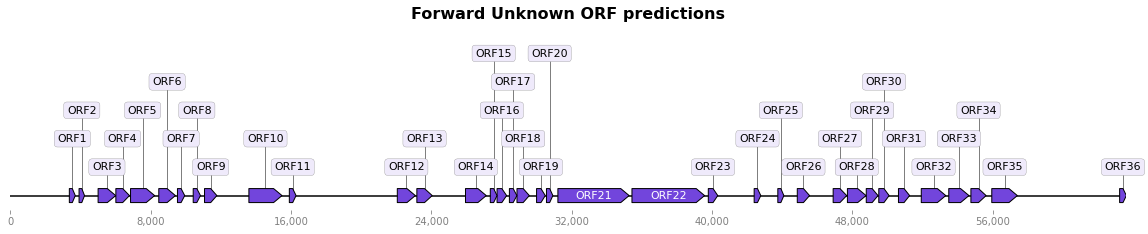

In [10]:
# Making the map of ORFs for the forward strand
from dna_features_viewer import BiopythonTranslator
graphic_record = BiopythonTranslator().translate_record('forward_output.gff')
ax, _ = graphic_record.plot(figure_width = 20)
ax.set_title('Forward Unknown ORF predictions', fontweight='bold', fontsize=16)
ax.figure.savefig('forwardmap.jpeg')

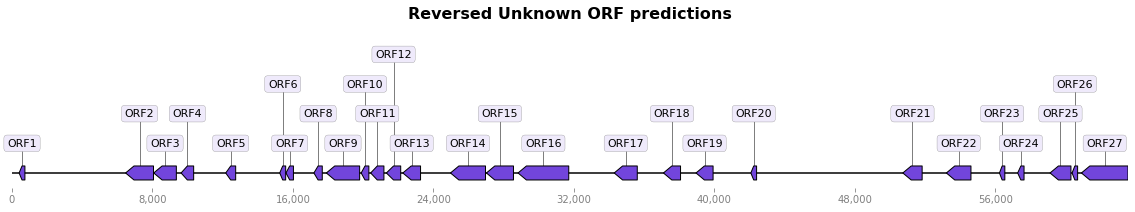

In [11]:
# Making the map of ORFs for the reversed complement strand
from dna_features_viewer import BiopythonTranslator
graphic_record = BiopythonTranslator().translate_record('reverse_output.gff')
ax, _ = graphic_record.plot(figure_width = 20)
ax.set_title('Reversed Unknown ORF predictions', fontweight = 'bold', fontsize=16)
ax.figure.savefig('reversemap.jpeg')

In [12]:
# Extension from 10/28 - FASTA-formatted files and combined map
# Forward FASTA file
fastafileforward = open('Delta_forward.fasta', 'w')
orf_prediction_string = ''
for orf in range(len(forward_aa_list)):
    orf_prediction_string = '>ORF' + str(orf+1) + 'F\n' + forward_aa_list[orf] + '\n' # starts at ORF 1
    fastafileforward.write(orf_prediction_string)
fastafileforward.close()

In [13]:
# Reversed FASTA file
fastafilereversed= open('Delta_reversed.fasta', 'w')
orf_prediction_string = ''
for orf in range(len(revcomp_aa_list)):
    orf_prediction_string = '>ORF' + str(orf+1) +  'R\n'+ revcomp_aa_list[orf]+ '\n' # starts at ORF 1
    fastafilereversed.write(orf_prediction_string)
fastafilereversed.close()

In [14]:
# Combined Map
# First, reverse the coordinates of the reverse complement strand
reverse_coordinate_comp1 = []
for each in backward_coordinate_list:
    new_coord = len(rev_comp_delta) - each
    reverse_coordinate_comp1.append(new_coord) #calculates the length between each orf
    
reverse_coordinate_list_comp2 = reverse_coordinate_comp1[::-1] #flips it so coords are in order

print(reverse_coordinate_list_comp2)
    

[447, 3098, 3316, 3630, 3696, 4886, 6367, 6729, 7461, 7766, 9390, 10790, 12170, 13270, 21598, 21924, 24076, 25047, 25929, 26903, 28393, 29706, 32295, 35183, 35443, 36984, 37036, 39030, 40735, 41745, 41865, 42680, 42821, 43576, 43679, 44116, 44204, 46099, 46332, 46808, 47974, 48399, 48415, 48753, 51263, 51829, 53656, 54372, 54642, 55931, 55943, 57532, 63266, 63595]


In [15]:
# Create the .gff file with the forward and reversed coordinate lists
combined_gff = open('output.gff', 'w')

forward_gff_string = '' #temp string
reverse_gff_string = '' #temp string
combined_gff_string = ''
line = ''
gene_num = 1

# Runs through the list of the forward coordinat
for i in range(0, len(forward_coordinate_list), 2):
    gene_name = 'ORF' + str(gene_num) 
    forward_gff_string += ('unknown' + '\t'
                        + gene_name + '\t'
                        + 'gene' + '\t'
                        + str(forward_coordinate_list[i]) + '\t'
                        + str(forward_coordinate_list[i+1]) + '\t'
                        + '-' + '\t'
                        + '+' + '\t'
                        + '-' + '\t'
                        + 'ID' + '\n')
    gene_num += 1
combined_gff_string += forward_gff_string
# Runs through the list of the reversed coordinatates
for i in range(0, len(reverse_coordinate_list_comp2), 2):
    gene_name = 'ORF' + str(gene_num) 
    reverse_gff_string += ('unknown' + '\t'
                        + gene_name + '\t'
                        + 'gene' + '\t'
                        + str(reverse_coordinate_list_comp2[i]) + '\t'
                        + str(reverse_coordinate_list_comp2[i+1]) + '\t'
                        + '-' + '\t'
                        + '-' + '\t'
                        + '-' + '\t'
                        + 'ID' + '\n')
    gene_num += 1
combined_gff_string += reverse_gff_string
combined_gff.write(combined_gff_string)
combined_gff.close()

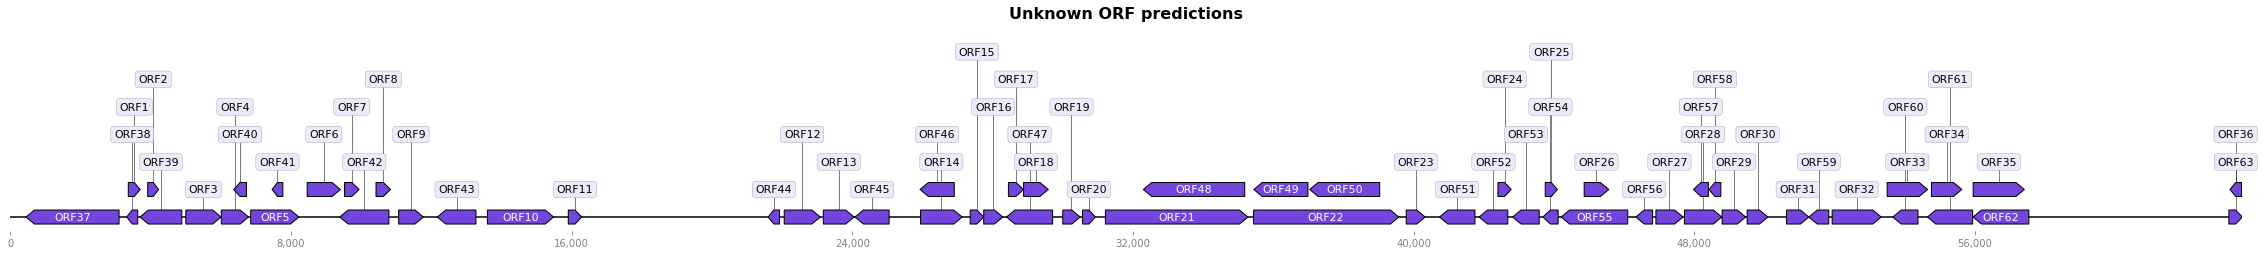

In [16]:
# Creating the map from the .gff file
from dna_features_viewer import BiopythonTranslator
graphic_record = BiopythonTranslator().translate_record("output.gff")
ax, _ = graphic_record.plot(figure_width = 40)
ax.set_title("Unknown ORF predictions", fontweight="bold", fontsize=16)
ax.figure.savefig("output.png")

In [17]:
# Create the .gff file with the forward and reversed coordinate lists
combined_gff = open('finaloutput.gff', 'w')

forward_gff_string = '' #temp string
reverse_gff_string = '' #temp string
combined_gff_string = ''
line = ''
gene_num = 1
gene_names = ''

# Runs through the list of the forward coordinates
for i in range(0, len(forward_coordinate_list), 2):
    gene_name = 'ORF' + str(gene_num) + 'F' 
    gene_names += gene_name + " "
    if (i == 42 or i == 56 or i == 24):
        forward_gff_string += ('unknown' + '\t'
                        + gene_name + '\t'
                        + 'known' + '\t'
                        + str(forward_coordinate_list[i]) + '\t'
                        + str(forward_coordinate_list[i+1]) + '\t'
                        + '-' + '\t'
                        + '+' + '\t'
                        + '-' + '\t'
                        + 'ID' + '\n')
    elif(i == 14 or i == 48):
        forward_gff_string += ('unknown' + '\t'
                        + gene_name + '\t'
                        + 'unknown' + '\t'
                        + str(forward_coordinate_list[i]) + '\t'
                        + str(forward_coordinate_list[i+1]) + '\t'
                        + '-' + '\t'
                        + '+' + '\t'
                        + '-' + '\t'
                        + 'ID' + '\n')
    else:
        forward_gff_string += ('unknown' + '\t'
                        + gene_name + '\t'
                        + 'gene' + '\t'
                        + str(forward_coordinate_list[i]) + '\t'
                        + str(forward_coordinate_list[i+1]) + '\t'
                        + '-' + '\t'
                        + '+' + '\t'
                        + '-' + '\t'
                        + 'ID' + '\n')
    
    gene_num += 1
combined_gff_string += forward_gff_string
# Runs through the list of the reversed coordinatates
gene_num = 1
for i in range(0, len(reverse_coordinate_list_comp2), 2):
    gene_name = 'ORF' + str(gene_num) + 'R'
    gene_names += gene_name + " "
    if (i == 6): #Same as above but for the reversed ORFs used
        reverse_gff_string += ('unknown' + '\t'
                        + gene_name + '\t'
                        + 'unknown' + '\t'
                        + str(reverse_coordinate_list_comp2[i]) + '\t'
                        + str(reverse_coordinate_list_comp2[i+1]) + '\t'
                        + '-' + '\t'
                        + '-' + '\t'
                        + '-' + '\t'
                        + 'ID' + '\n')
    else:
        reverse_gff_string += ('unknown' + '\t'
                        + gene_name + '\t'
                        + 'gene' + '\t'
                        + str(reverse_coordinate_list_comp2[i]) + '\t'
                        + str(reverse_coordinate_list_comp2[i+1]) + '\t'
                        + '-' + '\t'
                        + '-' + '\t'
                        + '-' + '\t'
                        + 'ID' + '\n')
    
    gene_num += 1
combined_gff_string += reverse_gff_string
combined_gff.write(combined_gff_string)
combined_gff.close()

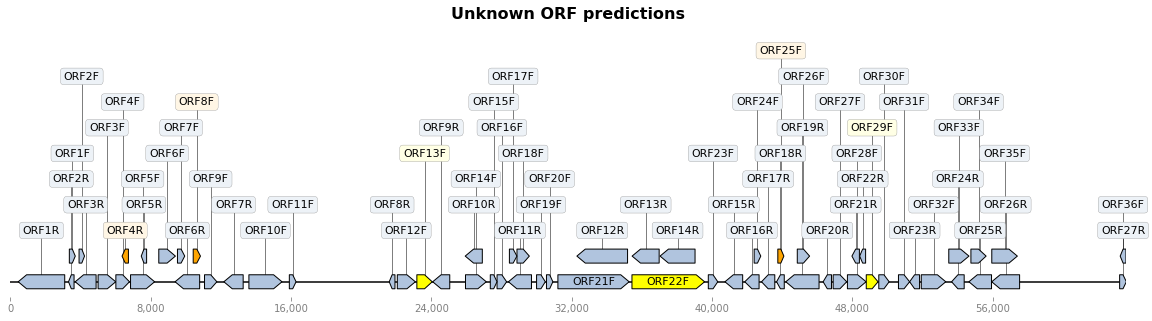

In [18]:
# Creating the map from the .gff file
from dna_features_viewer import BiopythonTranslator
# Function for coloring
def features_properties(f):
    """Features get a  color."""
    label = ["label", "name", "gene", "product", "source", "locus_tag", "note"]
    color = {
        "known": "yellow",
        "unknown": "orange",
        "actual_orf": "red",
    }.get(f.type, "lightsteelblue")
    return dict(color=color, label_fields=label)

translator = BiopythonTranslator(features_properties = features_properties)
graphic_record = translator.translate_record("finaloutput.gff")

ax, _ = graphic_record.plot(figure_width = 20, elevate_outline_annotations=True)
ax.set_title("Unknown ORF predictions", fontweight="bold", fontsize=16)
ax.figure.savefig("finaloutput.png")